Epoch 1/5
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1570 - accuracy: 0.9520 - val_loss: 0.0725 - val_accuracy: 0.9792
Epoch 2/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0551 - val_accuracy: 0.9852
Epoch 3/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0407 - val_accuracy: 0.9898
Epoch 4/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0511 - val_accuracy: 0.9860
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9890

Test Accuracy: 0.9890


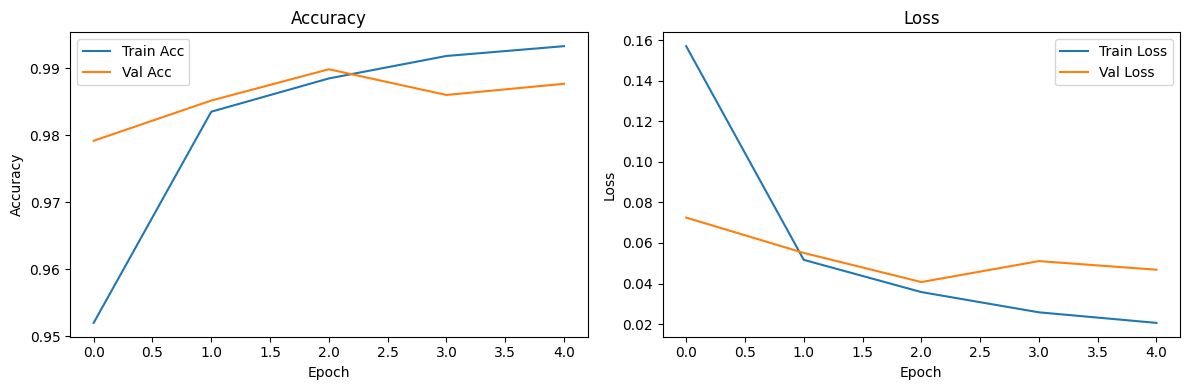

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for Conv2D input: (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Split training data into train and validation sets
x_train_small, x_val, y_train_small, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train_small, y_train_small, epochs=5, validation_data=(x_val, y_val))

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 1ms/step


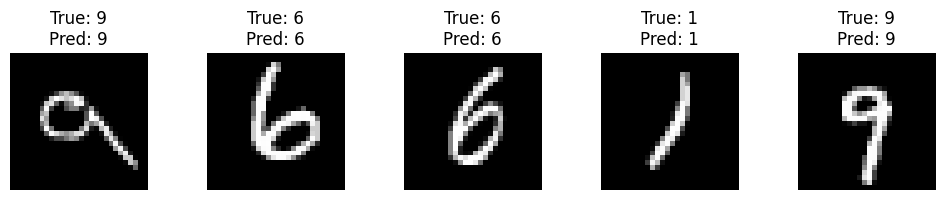

In [13]:
# Pick 5 random test images
indices = np.random.choice(len(x_test), 5, replace=False)

# Predict and plot
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    img = x_test[idx]
    true_label = y_test[idx]
    
    # Predict and plot
    prediction = model.predict(img.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()